In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных из файла в таблицу.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home_mortgage.csv')
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Проверка распределения данных

array([[<Axes: title={'center': 'BAD'}>,
        <Axes: title={'center': 'LOAN'}>,
        <Axes: title={'center': 'MORTDUE'}>],
       [<Axes: title={'center': 'VALUE'}>,
        <Axes: title={'center': 'YOJ'}>,
        <Axes: title={'center': 'DEROG'}>],
       [<Axes: title={'center': 'DELINQ'}>,
        <Axes: title={'center': 'CLAGE'}>,
        <Axes: title={'center': 'NINQ'}>],
       [<Axes: title={'center': 'CLNO'}>,
        <Axes: title={'center': 'DEBTINC'}>, <Axes: >]], dtype=object)

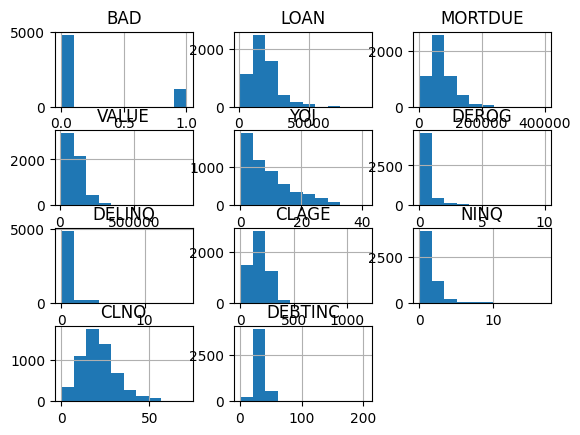

In [ ]:
df.hist()

Проверка отсутствия пропусков

In [ ]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
df.shape

(5960, 13)

Выбрасываем все строки с пропусками

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
df.shape

(3364, 13)

Кодировка столбцов

In [ ]:
one_hot = ['REASON', 'JOB']
one_hot_features=pd.get_dummies(df[one_hot])
one_hot_features

In [ ]:
df=df.drop(columns=one_hot)
df=df.join(one_hot_features)
df


Выбор входных и выходных столбцов

In [ ]:
input=df.iloc[:,1:]
output=df.iloc[:,0:1]
print(input)
print(output)

Выбор обучающего и тестового множеств

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2)
x_train = x_train.to_numpy() #преобразование в массив NumPy
x_test = x_test.to_numpy() #преобразование в массив NumPy
y_train = y_train.to_numpy() #преобразование в массив NumPy
y_test = y_test.to_numpy() #преобразование в массив NumPy
#y_test

Модель линейной регрессии

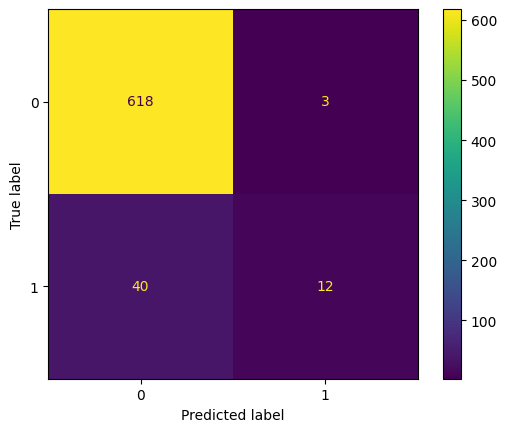

0.3352093910087064
0.9361069836552749
(array([0.93920973, 0.8       ]), array([0.99516908, 0.23076923]), array([0.96637998, 0.35820896]), array([621,  52]))


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

model=LogisticRegression(solver='newton-cholesky').fit(x_train, y_train.flatten())
predict_train=model.predict(x_train)
predict_test=model.predict(x_test)

cm = confusion_matrix(y_test, predict_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

print(cohen_kappa_score(y_test, predict_test))
print(accuracy_score(y_test, predict_test))
print(precision_recall_fscore_support(y_test, predict_test))

Модель дерева решений

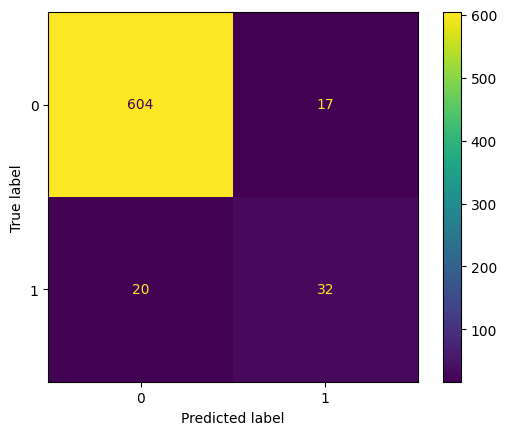

0.6039728358541279
0.9450222882615156
(array([0.96794872, 0.65306122]), array([0.9726248 , 0.61538462]), array([0.97028112, 0.63366337]), array([621,  52]))


In [ ]:
from sklearn import tree

model=tree.DecisionTreeClassifier().fit(x_train, y_train)
predict_train=model.predict(x_train)
predict_test=model.predict(x_test)

cm = confusion_matrix(y_test, predict_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

print(cohen_kappa_score(y_test, predict_test))
print(accuracy_score(y_test, predict_test))
print(precision_recall_fscore_support(y_test, predict_test))

Отрисовка дерева

In [ ]:
tree.plot_tree(model)